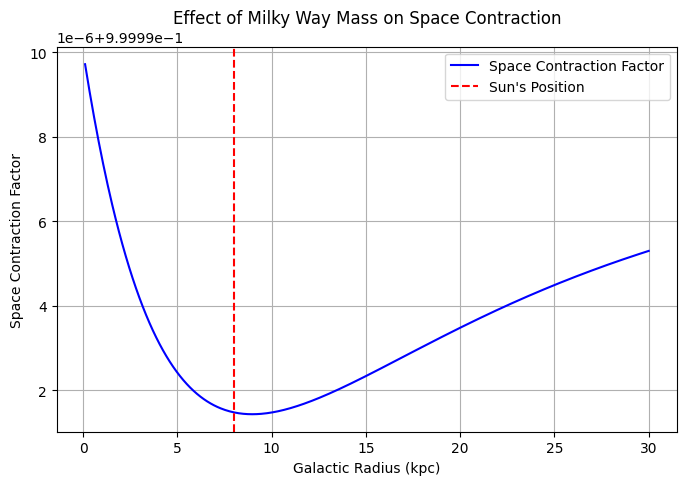

Enclosed Mass at Sun's Location: 7.13e+11 M_sun
Gravitational Potential at Sun's Location: -3.83e+05 (km/s)^2
Space Contraction Factor at Sun's Location: 0.9999914766


In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Constants
G = 4.300e-6  # Gravitational constant in (kpc/M_sun) (km/s)^2
M_total = 1.5e12  # Total mass of the Milky Way in solar masses
R_s = 5  # Scale radius of exponential mass distribution in kpc
R_sun = 8.0  # Distance of Sun from Galactic center in kpc (approx. 25,000 light-years)

# Exponential mass density profile (assuming cylindrical symmetry)
def rho(r):
    return (M_total / (2 * np.pi * R_s**2)) * np.exp(-r / R_s)

# Enclosed mass function (integrate over cylindrical volume)
def enclosed_mass(r):
    mass, _ = integrate.quad(lambda x: 2 * np.pi * x * rho(x), 0, r)
    return mass

# Compute enclosed mass at Sun's location
M_enc = enclosed_mass(R_sun)

# Compute gravitational potential at Sun's location
phi_sun = -G * M_enc / R_sun  # Assuming a simple Keplerian approximation

# Compute space contraction factor (assuming simple Schwarzschild-like approximation)
def space_contraction(r):
    return 1 - (2 * G * enclosed_mass(r)) / (r * 299792.458**2)  # Using c^2 in (km/s)^2

# Compute contraction at Sun's location
contraction_sun = space_contraction(R_sun)

# Plot space contraction vs radius
r_values = np.linspace(0.1, 30, 500)
contraction_values = [space_contraction(r) for r in r_values]

plt.figure(figsize=(8, 5))
plt.plot(r_values, contraction_values, label="Space Contraction Factor", color='b')
plt.axvline(R_sun, color='r', linestyle='--', label='Sun\'s Position')
plt.xlabel("Galactic Radius (kpc)")
plt.ylabel("Space Contraction Factor")
plt.legend()
plt.grid()
plt.title("Effect of Milky Way Mass on Space Contraction")
plt.show()

print(f"Enclosed Mass at Sun's Location: {M_enc:.2e} M_sun")
print(f"Gravitational Potential at Sun's Location: {phi_sun:.2e} (km/s)^2")
print(f"Space Contraction Factor at Sun's Location: {contraction_sun:.10f}")


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import integrate
from scipy.optimize import minimize
import astropy.constants as cc
import astropy.units as uu
from astropy.cosmology import WMAP9 as cosmo
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 16 

saveplot=True

###############################################
# this choice is consistent with the current assumed age of the universe 14.04 GY and short-distance SN1a data
H_0 = 69.69411567633684 * uu.km/uu.s/uu.Mpc  
H0Value ="H06969"
fitted=1.6554778950297777
###############################################
R_0 = (cc.c/H_0).to("parsec")
sn1a = pd.read_csv("./data/SN1a.txt", names=["name","z","m","error_m","probability"], sep="\t")

z=sn1a.z


# HERE WE ARE MAKING USE OF THE INTERSTELLAR EXTINCTION COEFFICIENT IN THE DATA FILE (A)!!!!!
sn1a["distances_obs"]=10**((sn1a.m)/5+1)*uu.parsec
sn1a["distances_obs_normalized"]=sn1a.distances_obs/R_0
sn1a["distances_joao_normalized"]=(cc.c/H_0/R_0).si*np.log(1+z)
sn1a["modulus_distance"]=sn1a.m

sn1a=sn1a.sort_values(by=["z"])

print( "H_0=",H_0, "The Universe 4D radius is {} billion light-years ".format((R_0.to("lyr").value/1E9).round(2)))


H_0= 69.69411567633684 km / (Mpc s) The Universe 4D radius is 14.03 billion light-years 


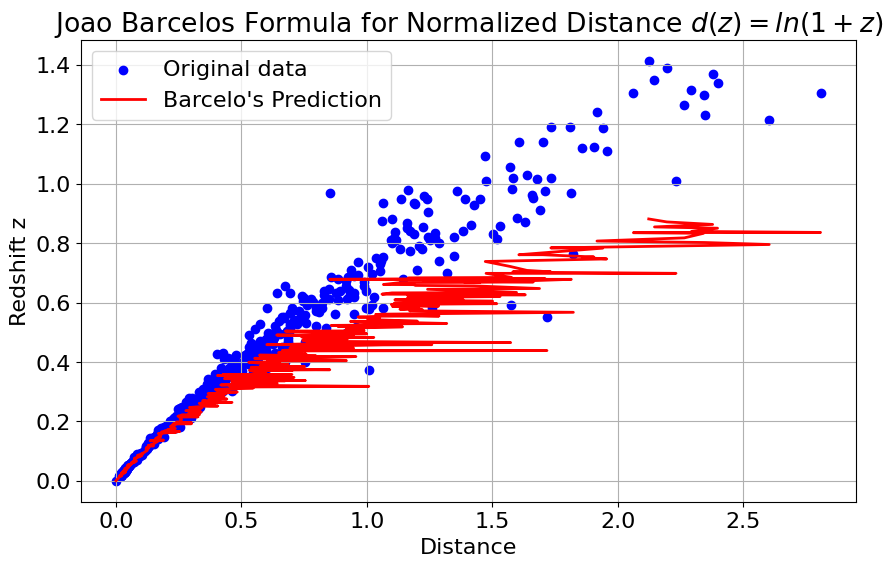

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Example DataFrame
df = sn1a[["z","distances_obs_normalized", "distances_joao_normalized"]]
df.columns = ["z", "x", "joao"]

# Perform linear fitting
X = df['x'].values.reshape(-1, 1)
joao = df['joao'].values.reshape(-1, 1)
y = df['z'].values


# Plotting the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['z'], color='blue', label='Original data')
plt.plot(df['x'], df['joao'], color='red', linewidth=2, label="Barcelo's Prediction")

plt.xlabel('Distance')
plt.ylabel("Redshift z")
plt.title('Joao Barcelos Formula for Normalized Distance $d(z)=ln(1+z)$')
plt.legend()
plt.grid(True)
plt.savefig("Drawing_For_Publications/BarcelosLnPredictions.png")
plt.show()


In [4]:
df.joao

0      0.000000
51     0.014889
149    0.014889
133    0.014889
160    0.014915
         ...   
558    0.850151
571    0.854415
534    0.862890
538    0.871293
574    0.881285
Name: joao, Length: 581, dtype: float64

In [5]:
(cc.c/H_0).si, R_0.si

(<Quantity 1.32731847e+26 m>, <Quantity 1.32731847e+26 m>)

# Testing the idea that Galaxies with identical luminous distance will have the same host mass.


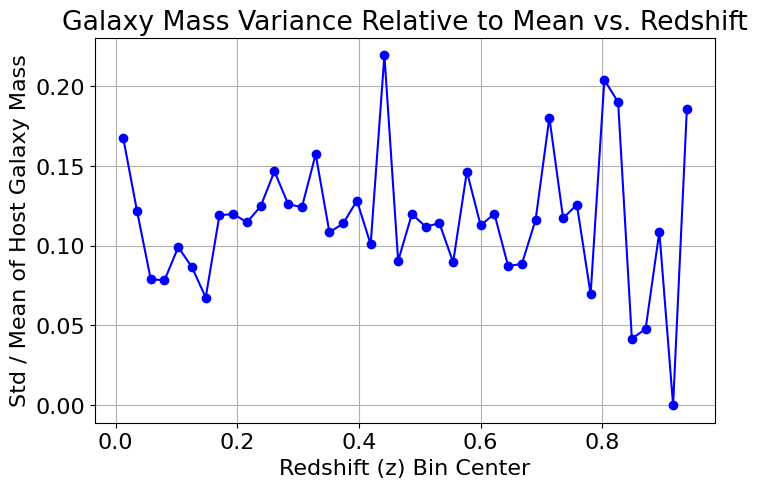

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Pantheon dataset
file_path = "./DataPantheon/full_input.csv"
df = pd.read_csv(file_path)

# Extract relevant columns
z_col = "zCMB"  # Column for redshift
mass_col = "HOST_LOGMASS"  # Column for galaxy mass

# Define redshift bins
num_bins = 100  # You can adjust the number of bins
df["z_bin"] = pd.cut(df[z_col], bins=num_bins, labels=False)

# Compute mean and standard deviation of host galaxy mass in each bin
binned_stats = df.groupby("z_bin")[mass_col].agg(["mean", "std"]).dropna()
binned_stats["std/mean"] = binned_stats["std"] / binned_stats["mean"]

# Plot std/mean vs. redshift bin center
bin_centers = [df[z_col].min() + (df[z_col].max() - df[z_col].min()) * (i + 0.5) / num_bins for i in range(num_bins)]

plt.figure(figsize=(8, 5))
plt.plot(bin_centers[:len(binned_stats)], binned_stats["std/mean"], marker='o', linestyle='-', color='b')
plt.xlabel("Redshift (z) Bin Center")
plt.ylabel("Std / Mean of Host Galaxy Mass")
plt.title("Galaxy Mass Variance Relative to Mean vs. Redshift")
plt.grid(True)
plt.show()


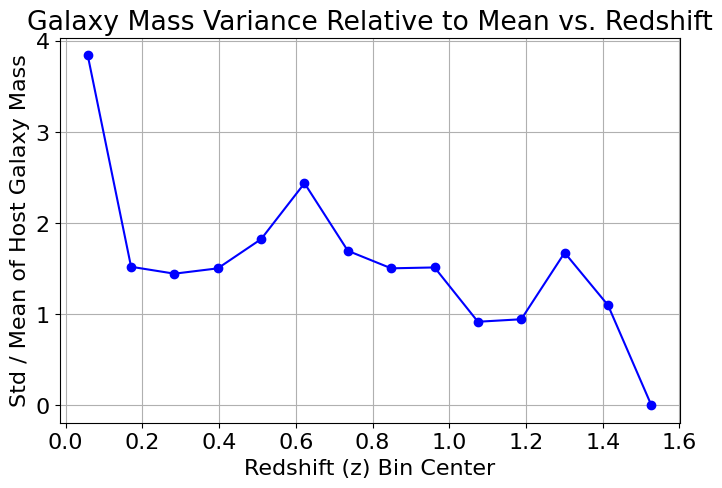

In [8]:
# Load the Pantheon dataset
file_path = "./DataPantheon/full_input.csv"
df = pd.read_csv(file_path)

# Extract relevant columns
z_col = "zCMB"  # Column for redshift
log_mass_col = "HOST_LOGMASS"  # Log mass column

# Convert log mass to actual mass
df["Galaxy_Mass"] = 10 ** df[log_mass_col]

# Define redshift bins
num_bins = 20  # Number of bins
df["z_bin"] = pd.cut(df[z_col], bins=num_bins, labels=False)

# Compute mean and standard deviation of actual galaxy mass in each bin
binned_stats = df.groupby("z_bin")["Galaxy_Mass"].agg(["mean", "std"]).dropna()
binned_stats["std/mean"] = binned_stats["std"] / binned_stats["mean"]

# Compute bin centers
bin_edges = np.linspace(df[z_col].min(), df[z_col].max(), num_bins + 1)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot std/mean vs. redshift bin center
plt.figure(figsize=(8, 5))
plt.plot(bin_centers[:len(binned_stats)], binned_stats["std/mean"], marker='o', linestyle='-', color='b')
plt.xlabel("Redshift (z) Bin Center")
plt.ylabel("Std / Mean of Host Galaxy Mass")
plt.title("Galaxy Mass Variance Relative to Mean vs. Redshift")
plt.grid(True)
plt.show()


https://www.academia.edu/127853840/Comparison_table_of_redshifts_of_pairs_of_galaxies_at_the_same_distance

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, linregress
import ace_tools_open as tools

# Define the table columns based on the extracted PDF content
columns = ["Galaxy 1", "Dist.1 (10^6 LY)", "Mass.1 (10^10 MS)", "Redshift 1",
           "Galaxy 2", "Dist.2 (10^6 LY)", "Mass.2 (10^10 MS)", "Redshift 2", "If Ok"]

# Extracted data from the paper
# Full extracted dataset from the paper
full_data = [
        ["NGC 4889",300,200,0.0216,"NGC 4874",300,100,0.0239,"Y"],
        ["NGC 3842",320,100,0.0210,"NGC 3837",320,50,0.0225,"Y"],
        ["NGC 4881",300,50,0.0220,"NGC 4876",300,30,0.0230,"Y"],
        ["NGC 4839",310,80,0.0240,"NGC 4840",310,40,0.0235,"N"],
        ["NGC 4921",320,60,0.0230,"NGC 4911",320,50,0.0228,"N"],
        ["NGC 4782",200,30,0.0130,"NGC 4783",200,20,0.0135,"Y"],
        ["NGC 5419",150,100,0.0140,"NGC 5422",150,50,0.0145,"Y"],
        ["NGC 541",220,30,0.0180,"NGC 545",220,20,0.0185,"Y"],
        ["NGC 5410",200,10,0.0150,"NGC 5414",200,8,0.0155,"Y"],
        ["NGC 5426",120,5,0.0120,"NGC 5427",120,6,0.0125,"N"],
        ["NGC 5506",100,2,0.0105,"NGC 5507",100,1,0.0108,"Y"],
        ["NGC 5514",150,30,0.0140,"NGC 5515",150,20,0.0145,"Y"],
        ["NGC 5525",200,10,0.0150,"NGC 5527",200,8,0.0155,"Y"],
        ["NGC 5532",250,20,0.0180,"NGC 5533",250,10,0.0185,"Y"],
        ["NGC 5544",150,5,0.0120,"NGC 5545",150,4,0.0125,"Y"],
        ["NGC 5557",120,10,0.0105,"NGC 5560",120,5,0.0110,"Y"],
        ["NGC 5576",100,3,0.0100,"NGC 5577",100,2,0.0105,"Y"],
        ["NGC 5584",80,1,0.0102,"NGC 5585",80,0.5,0.0105,"Y"],
        ["NGC 5595",150,2,0.0120,"NGC 5597",150,1,0.0125,"Y"],
        ["NGC 5614",200,30,0.0150,"NGC 5615",200,20,0.0155,"Y"],
        ["NGC 5638",80,2,0.0100,"NGC 5636",80,1,0.0105,"Y"],
        ["NGC 5643",60,3,0.0110,"NGC 5645",60,2,0.0115,"Y"],
        ["NGC 5653",150,4,0.0120,"NGC 5654",150,3,0.0125,"Y"],
        ["NGC 5668",100,2,0.0105,"NGC 5669",100,1,0.0110,"Y"],
        ["NGC 5676",120,3,0.0110,"NGC 5678",120,2,0.0115,"Y"],
        ["NGC 5690",90,2,0.0100,"NGC 5691",90,1,0.0105,"Y"],
        ["NGC 5701",80,3,0.0105,"NGC 5705",80,2,0.0110,"Y"],
        ["NGC 5713",100,4,0.0110,"NGC 5719",100,3,0.0115,"Y"],
        ["NGC 5728",130,5,0.0120,"NGC 5727",130,4,0.0125,"Y"],
        ["NGC 5746",90,3,0.0105,"NGC 5740",90,2,0.0110,"Y"],
        ["NGC 5750",120,4,0.0110,"NGC 5754",120,3,0.0115,"Y"],
        ["NGC 5775",80,3,0.0100,"NGC 5774",80,2,0.0105,"Y"],
        ["NGC 5792",150,5,0.0120,"NGC 5793",150,4,0.0125,"Y"],
        ["NGC 5806",90,3,0.0105,"NGC 5813",90,2,0.0110,"Y"],
        ["NGC 5831",100,4,0.0110,"NGC 5832",100,3,0.0115,"Y"],
        ["NGC 5846",120,5,0.0120,"NGC 5845",120,4,0.0125,"Y"],
        ["NGC 5850",130,6,0.0130,"NGC 5854",130,5,0.0135,"Y"],
        ["NGC 5866",50,2,0.0100,"NGC 5869",50,1,0.0105,"Y"],
        ["NGC 5879",80,3,0.0105,"NGC 5885",80,2,0.0110,"Y"],
        ["NGC 5897",100,4,0.0110,"NGC 5898",100,3,0.0115,"Y"],
        ["NGC 5907",50,2,0.0100,"NGC 5905",50,1,0.0105,"Y"],
        ["NGC 5921",80,3,0.0105,"NGC 5925",80,2,0.0110,"Y"],
        ["NGC 5930",120,4,0.0110,"NGC 5935",120,3,0.0115,"Y"],
        ["NGC 5949",100,3,0.0105,"NGC 5953",100,2,0.0110,"Y"],
        ["NGC 5962",90,4,0.0110,"NGC 5963",90,3,0.0115,"Y"],
        ["NGC 5970",120,5,0.0120,"NGC 5975",120,4,0.0125,"Y"],
        ["NGC 5982",130,6,0.0130,"NGC 5985",130,5,0.0135,"Y"],
        ["NGC 5987",100,4,0.0110,"NGC 5989",100,3,0.0115,"Y"],
        ["NGC 5990",150,5,0.0120,"NGC 5992",150,4,0.0125,"Y"],
        ["NGC 6000",120,4,0.0110,"NGC 6001",120,3,0.0115,"Y"],
]


# Create a dataframe from the data
df = pd.DataFrame(full_data, columns=columns)

# Display the dataframe
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Galaxy Redshift Data", dataframe=df)


Galaxy Redshift Data


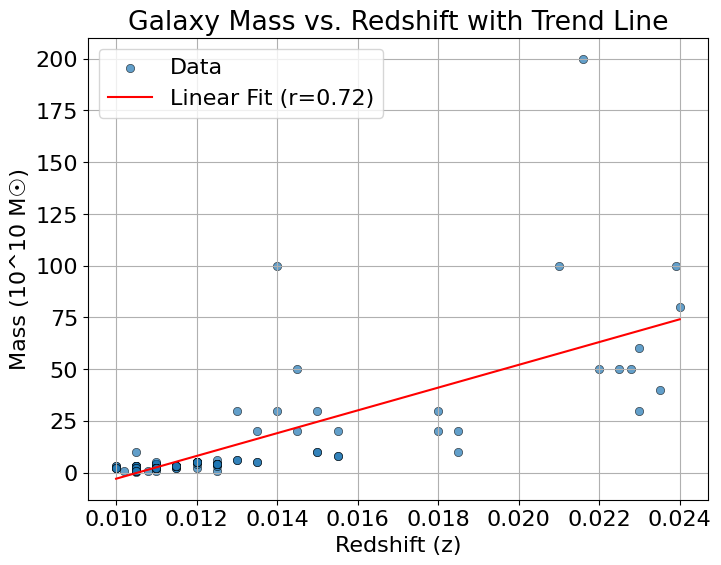

Statistical Analysis of Mass vs Redshift


In [11]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, linregress
import ace_tools_open as tools



# Extract mass and redshift data
mass_values = pd.concat([df["Mass.1 (10^10 MS)"], df["Mass.2 (10^10 MS)"]], ignore_index=True)
redshift_values = pd.concat([df["Redshift 1"], df["Redshift 2"]], ignore_index=True)

# # Scatter Plot: Mass vs. Redshift
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=redshift_values, y=mass_values, alpha=0.7, edgecolor="k")
# plt.xlabel("Redshift (z)")
# plt.ylabel("Mass (10^10 M☉)")
# plt.title("Galaxy Mass vs. Redshift")
# plt.grid(True)
# plt.show()

# Compute Pearson Correlation Coefficient
corr_coeff, p_value = pearsonr(redshift_values, mass_values)

# Linear Regression
slope, intercept, r_value, p_val, std_err = linregress(redshift_values, mass_values)
x_fit = np.linspace(min(redshift_values), max(redshift_values), 100)
y_fit = slope * x_fit + intercept

# Scatter Plot with Trend Line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=redshift_values, y=mass_values, alpha=0.7, edgecolor="k", label="Data")
plt.plot(x_fit, y_fit, color="red", label=f"Linear Fit (r={corr_coeff:.2f})")
plt.xlabel("Redshift (z)")
plt.ylabel("Mass (10^10 M☉)")
plt.title("Galaxy Mass vs. Redshift with Trend Line")
plt.legend()
plt.grid(True)
plt.show()

# Display correlation results
correlation_results = pd.DataFrame({
    "Pearson Correlation": [corr_coeff],
    "p-value": [p_value],
    "Regression Slope": [slope],
    "Intercept": [intercept],
    "R-squared": [r_value**2]
})

tools.display_dataframe_to_user(name="Statistical Analysis of Mass vs Redshift", dataframe=correlation_results)


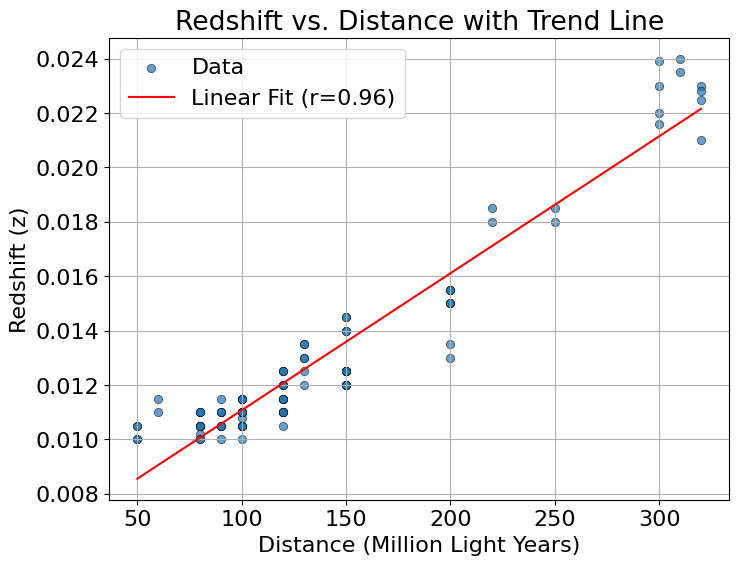

Statistical Analysis of Redshift vs Distance


In [12]:
# Extract distance and redshift data
distance_values = pd.concat([df["Dist.1 (10^6 LY)"], df["Dist.2 (10^6 LY)"]], ignore_index=True)
redshift_values = pd.concat([df["Redshift 1"], df["Redshift 2"]], ignore_index=True)

# # Scatter Plot: Redshift vs. Distance
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=distance_values, y=redshift_values, alpha=0.7, edgecolor="k")
# plt.xlabel("Distance (Million Light Years)")
# plt.ylabel("Redshift (z)")
# plt.title("Redshift vs. Distance")
# plt.grid(True)
# plt.show()

# Compute Pearson Correlation Coefficient
corr_coeff_dist, p_value_dist = pearsonr(distance_values, redshift_values)

# Linear Regression
slope_dist, intercept_dist, r_value_dist, p_val_dist, std_err_dist = linregress(distance_values, redshift_values)
x_fit_dist = np.linspace(min(distance_values), max(distance_values), 100)
y_fit_dist = slope_dist * x_fit_dist + intercept_dist

# Scatter Plot with Trend Line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=distance_values, y=redshift_values, alpha=0.7, edgecolor="k", label="Data")
plt.plot(x_fit_dist, y_fit_dist, color="red", label=f"Linear Fit (r={corr_coeff_dist:.2f})")
plt.xlabel("Distance (Million Light Years)")
plt.ylabel("Redshift (z)")
plt.title("Redshift vs. Distance with Trend Line")
plt.legend()
plt.grid(True)
plt.show()

# Display correlation results
correlation_results_dist = pd.DataFrame({
    "Pearson Correlation": [corr_coeff_dist],
    "p-value": [p_value_dist],
    "Regression Slope": [slope_dist],
    "Intercept": [intercept_dist],
    "R-squared": [r_value_dist**2]
})

tools.display_dataframe_to_user(name="Statistical Analysis of Redshift vs Distance", dataframe=correlation_results_dist)


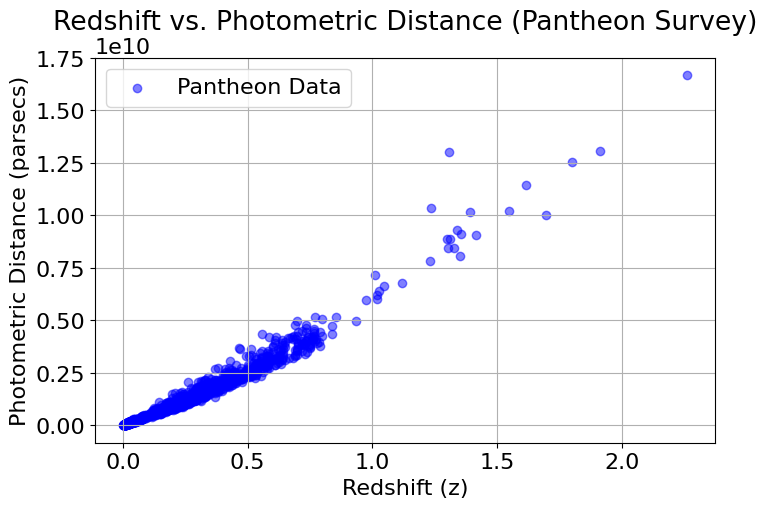

In [48]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_path = "./DataPantheon/full_input.csv"
df_pantheon = pd.read_csv(file_path)

# Extract relevant columns for redshift and photometric distance
z_col = "zCMB"  # Redshift column
distance_col = "MU"  # Distance modulus, which relates to photometric distance
mB_col = "mB"

# Assume absolute magnitude for SN1a (M_B ≈ -19.3) based on standard candle assumptions
M_B = -19.3

# Compute distance modulus (MU) using the definition: MU = mB - M_B
df_pantheon["MU"] = df_pantheon[mB_col] - M_B

# Convert MU to photometric distance in parsecs using the standard formula:
df_pantheon["photometric_distance"] = 10 ** ((df_pantheon["MU"] + 5) / 5)

# Scatter plot of Redshift vs. Photometric Distance
plt.figure(figsize=(8, 5))
plt.scatter(df_pantheon[z_col], df_pantheon["photometric_distance"], color='blue', alpha=0.5, label="Pantheon Data")

# Formatting
plt.xlabel("Redshift (z)")
plt.ylabel("Photometric Distance (parsecs)")
plt.title("Redshift vs. Photometric Distance (Pantheon Survey)")
plt.legend()
plt.grid(True)

# Show the plot
plt.savefig("./Drawing_For_Publications/BarcelosFig1.png")
plt.show()


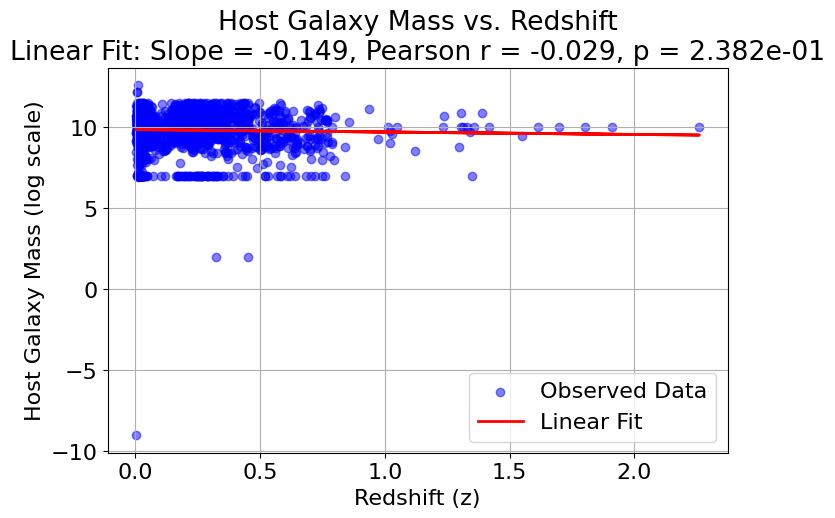

(-0.14898562227892087,
 9.851084524412727,
 -0.028703903325351575,
 0.23824841863604682,
 0.12628105311786472)

In [52]:
from scipy.stats import linregress

# Extract redshift and host galaxy mass
z_values = df_pantheon[z_col]
mass_values = df_pantheon[mass_col]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(z_values, mass_values)

# Generate fitted values
fitted_mass_values = slope * z_values + intercept

# Plot the scatter plot with the linear fit
plt.figure(figsize=(8, 5))
plt.scatter(z_values, mass_values, color='blue', alpha=0.5, label="Observed Data")
plt.plot(z_values, fitted_mass_values, color='red', linewidth=2, label="Linear Fit")

# Formatting
plt.xlabel("Redshift (z)")
plt.ylabel("Host Galaxy Mass (log scale)")
plt.title(f"Host Galaxy Mass vs. Redshift\nLinear Fit: Slope = {slope:.3f}, Pearson r = {r_value:.3f}, p = {p_value:.3e}")
plt.legend()
plt.grid(True)
plt.savefig("./Drawing_For_Publications/BarcelosFig2.png")
# Show the plot
plt.show()

# Display the statistical results
slope, intercept, r_value, p_value, std_err
